In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [13]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load the dataset
file_path = "CPSData.csv"  # Update the path if needed
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Overview:")
print(data.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131302 entries, 0 to 131301
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   PeopleInHousehold   131302 non-null  int64  
 1   Region              131302 non-null  object 
 2   State               131302 non-null  object 
 3   MetroAreaCode       97064 non-null   float64
 4   Age                 131302 non-null  int64  
 5   Married             105964 non-null  object 
 6   Sex                 131302 non-null  object 
 7   Education           105964 non-null  object 
 8   Race                131302 non-null  object 
 9   Hispanic            131302 non-null  int64  
 10  CountryOfBirthCode  131302 non-null  int64  
 11  Citizenship         131302 non-null  object 
 12  EmploymentStatus    105513 non-null  object 
 13  Industry            66242 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 14.0+ MB
None


In [15]:
# Display the first few rows of the dataset
print("\nFirst Few Rows:")
print(data.head())

# Handle missing values (example: filling with placeholders or dropping)
print("\nMissing Values Count:")
print(data.isnull().sum())

# Fill or drop missing values as necessary
# Example: Dropping rows with missing values in key columns
cleaned_data = data.dropna(subset=['MetroAreaCode', 'Married', 'Education', 'EmploymentStatus', 'Industry'])


First Few Rows:
   PeopleInHousehold Region    State  MetroAreaCode  Age        Married  \
0                  1  South  Alabama        26620.0   85        Widowed   
1                  3  South  Alabama        13820.0   21  Never Married   
2                  3  South  Alabama        13820.0   37  Never Married   
3                  3  South  Alabama        13820.0   18  Never Married   
4                  3  South  Alabama        26620.0   52        Widowed   

      Sex               Education   Race  Hispanic  CountryOfBirthCode  \
0  Female        Associate degree  White         0                  57   
1    Male             High school  Black         0                  57   
2  Female             High school  Black         0                  57   
3    Male  No high school diploma  Black         0                  57   
4  Female        Associate degree  White         0                  57   

       Citizenship    EmploymentStatus                            Industry  
0  Citizen

In [16]:
# Display a summary of cleaned data
print("\nCleaned Data Summary:")
print(cleaned_data.info())

# Save cleaned data for further use
cleaned_data.to_csv("Cleaned_CPSData.csv", index=False)


Cleaned Data Summary:
<class 'pandas.core.frame.DataFrame'>
Index: 49396 entries, 1 to 129676
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PeopleInHousehold   49396 non-null  int64  
 1   Region              49396 non-null  object 
 2   State               49396 non-null  object 
 3   MetroAreaCode       49396 non-null  float64
 4   Age                 49396 non-null  int64  
 5   Married             49396 non-null  object 
 6   Sex                 49396 non-null  object 
 7   Education           49396 non-null  object 
 8   Race                49396 non-null  object 
 9   Hispanic            49396 non-null  int64  
 10  CountryOfBirthCode  49396 non-null  int64  
 11  Citizenship         49396 non-null  object 
 12  EmploymentStatus    49396 non-null  object 
 13  Industry            49396 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 5.7+ MB
None


In [17]:
# Replace infinite values with NaN
data.replace([float('inf'), float('-inf')], float('nan'), inplace=True)

# Drop rows with NaN (if necessary)
data.dropna(inplace=True)

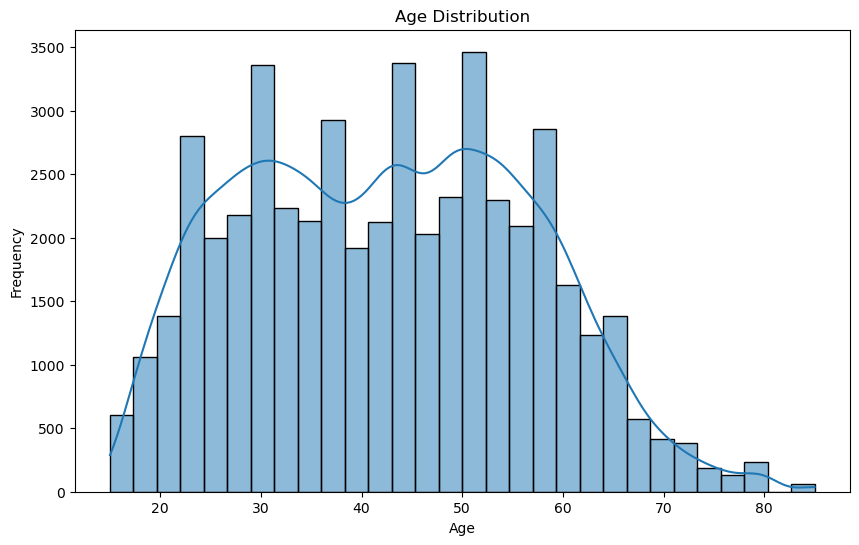

In [18]:
# Exploratory Visualization Example 1: Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_data, x='Age', bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

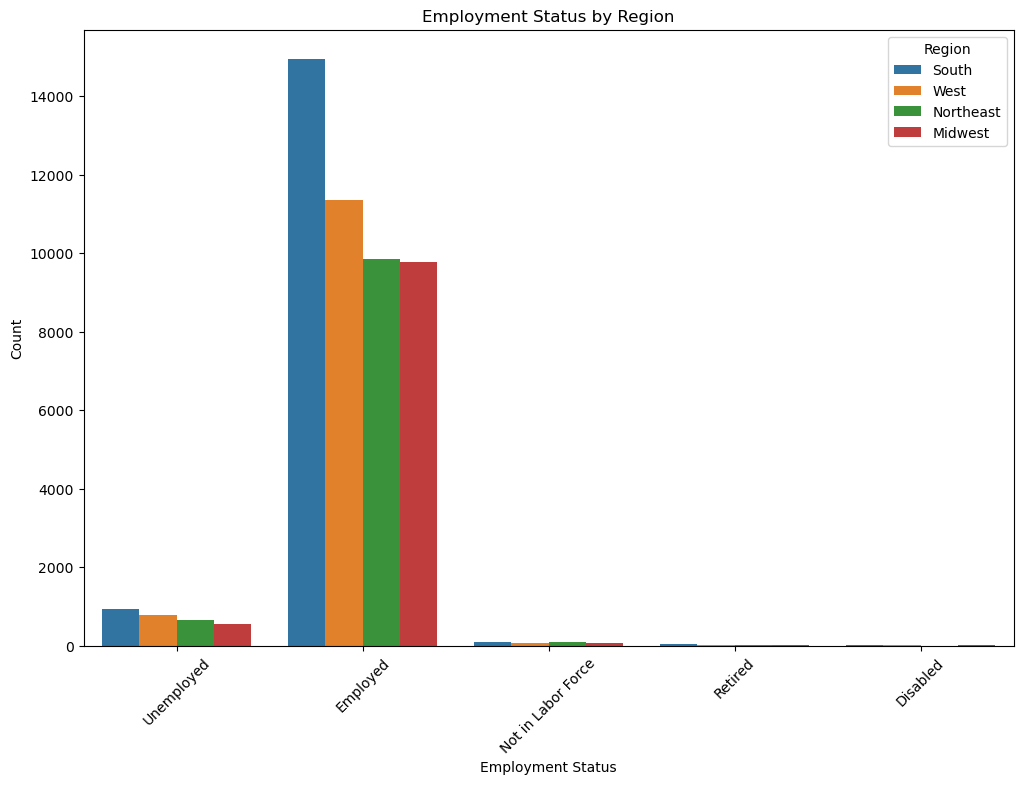

In [19]:
# Exploratory Visualization Example 2: Employment Status by Region
plt.figure(figsize=(12, 8))
sns.countplot(data=cleaned_data, x='EmploymentStatus', hue='Region')
plt.title("Employment Status by Region")
plt.xlabel("Employment Status")
plt.ylabel("Count")
plt.legend(title="Region")
plt.xticks(rotation=45)
plt.show()

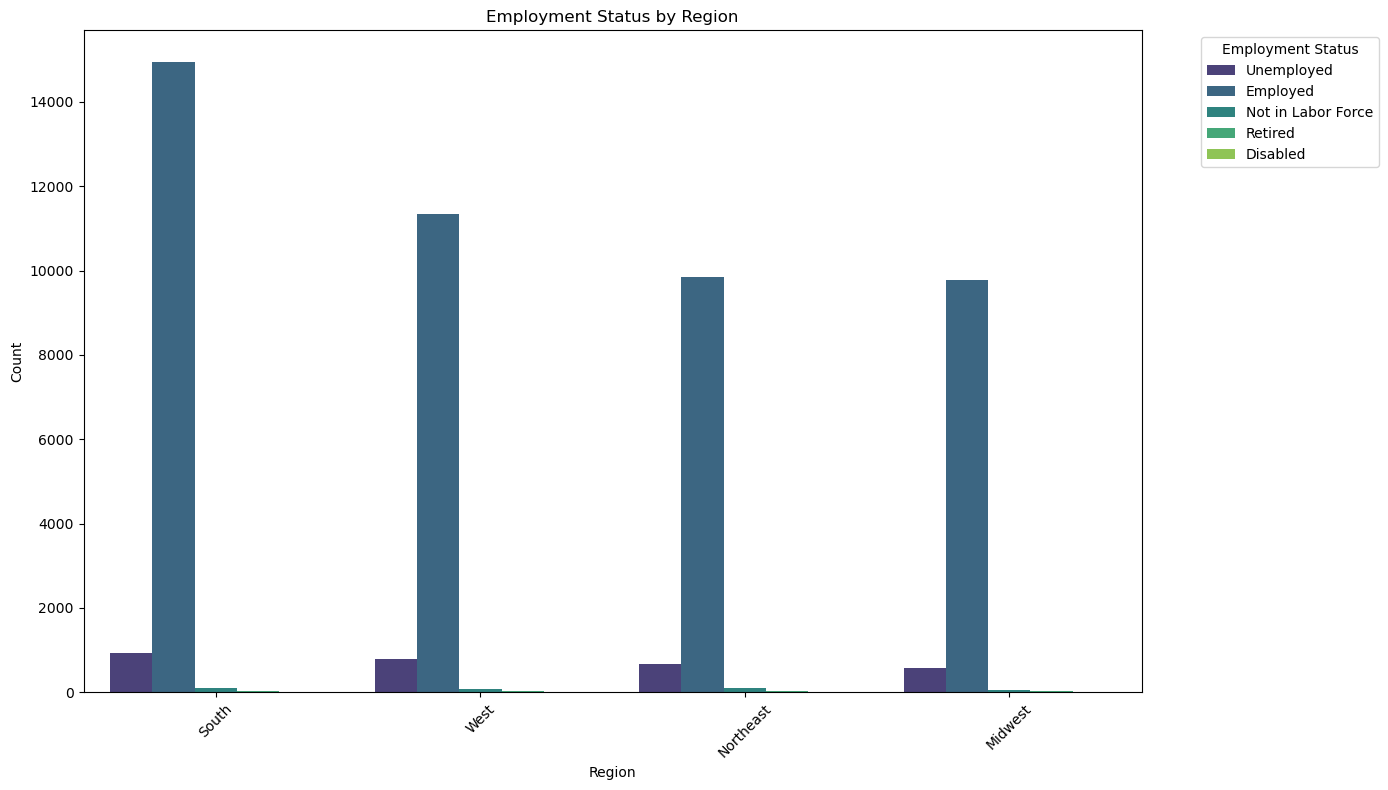

In [20]:
# Grouped Bar Chart: Employment Status by Region
plt.figure(figsize=(14, 8))
sns.countplot(data=cleaned_data, x='Region', hue='EmploymentStatus', palette='viridis')
plt.title("Employment Status by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.legend(title="Employment Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

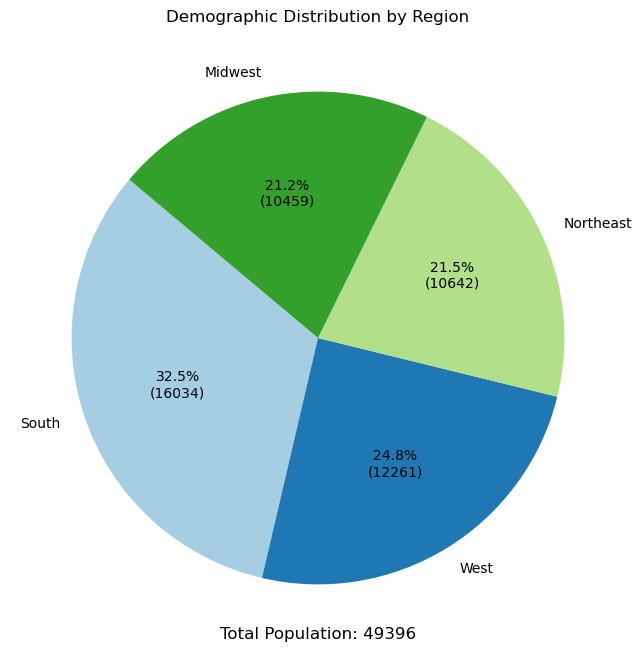

In [42]:
# Pie Chart: Demographic Distribution by Region with Different Colors
region_counts = cleaned_data['Region'].value_counts()

# Define a color palette (one color per slice)
colors = plt.cm.Paired(range(len(region_counts)))

# Calculate total population
total_population = region_counts.sum()

# Function to display percentages and absolute numbers
def autopct_format(pct, all_vals):
    absolute = int(round(pct / 100. * sum(all_vals)))
    return f"{pct:.1f}%\n({absolute})"

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    region_counts,
    labels=region_counts.index,
    autopct=lambda pct: autopct_format(pct, region_counts),
    startangle=140,
    colors=colors  # Use the defined color palette
)
plt.title("Demographic Distribution by Region")
plt.text(
    0, -1.2,  # Position of the subtitle
    f"Total Population: {total_population}",  # Subtitle text
    ha='center',  # Horizontal alignment
    va='center',  # Vertical alignment
    fontsize=12
)
plt.show()


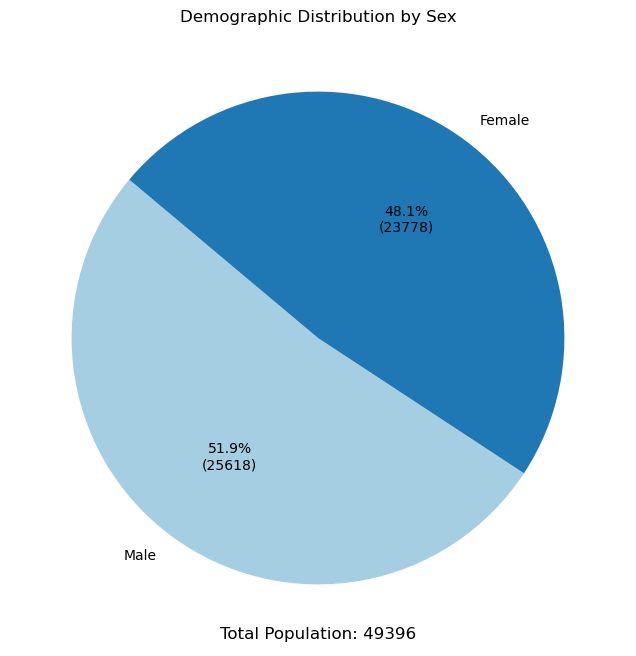

In [41]:
# Pie Chart: Demographic Distribution by Sex
sex_counts = cleaned_data['Sex'].value_counts()

# Define a color palette (one color per slice)
colors = plt.cm.Paired(range(len(sex_counts)))

# Calculate total population
total_population = sex_counts.sum()

# Function to display percentages and absolute numbers
def autopct_format(pct, all_vals):
    absolute = int(round(pct / 100. * sum(all_vals)))
    return f"{pct:.1f}%\n({absolute})"

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sex_counts,
    labels=sex_counts.index,
    autopct=lambda pct: autopct_format(pct, sex_counts),
    startangle=140,
    colors=colors  # Use the defined color palette
)
plt.title("Demographic Distribution by Sex")
plt.text(
    0, -1.2,  # Position of the subtitle
    f"Total Population: {total_population}",  # Subtitle text
    ha='center',  # Horizontal alignment
    va='center',  # Vertical alignment
    fontsize=12
)
plt.show()

In [27]:
"""# Plot the stacked bar chart
education_state_data.plot(
    kind='bar',
    stacked=True,
    figsize=(16, 10),
    colormap='tab10'
)
plt.title("Education Levels by State")
plt.xlabel("State")
plt.ylabel("Count")
plt.legend(title="Education Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show


'# Plot the stacked bar chart\neducation_state_data.plot(\n    kind=\'bar\',\n    stacked=True,\n    figsize=(16, 10),\n    colormap=\'tab10\'\n)\nplt.title("Education Levels by State")\nplt.xlabel("State")\nplt.ylabel("Count")\nplt.legend(title="Education Level", bbox_to_anchor=(1.05, 1), loc=\'upper left\')\nplt.xticks(rotation=90)\nplt.tight_layout()\nplt.show\n'

In [23]:
print(cleaned_data.columns)

Index(['PeopleInHousehold', 'Region', 'State', 'MetroAreaCode', 'Age',
       'Married', 'Sex', 'Education', 'Race', 'Hispanic', 'CountryOfBirthCode',
       'Citizenship', 'EmploymentStatus', 'Industry'],
      dtype='object')


In [24]:
print(cleaned_data[['State', 'Education']].isnull().sum())

State        0
Education    0
dtype: int64


In [25]:
# Check for missing values in State and Education columns and drop them if necessary
education_state_data = (
    cleaned_data.dropna(subset=['State', 'Education'])
    .groupby(['State', 'Education'])
    .size()
    .unstack(fill_value=0)
)

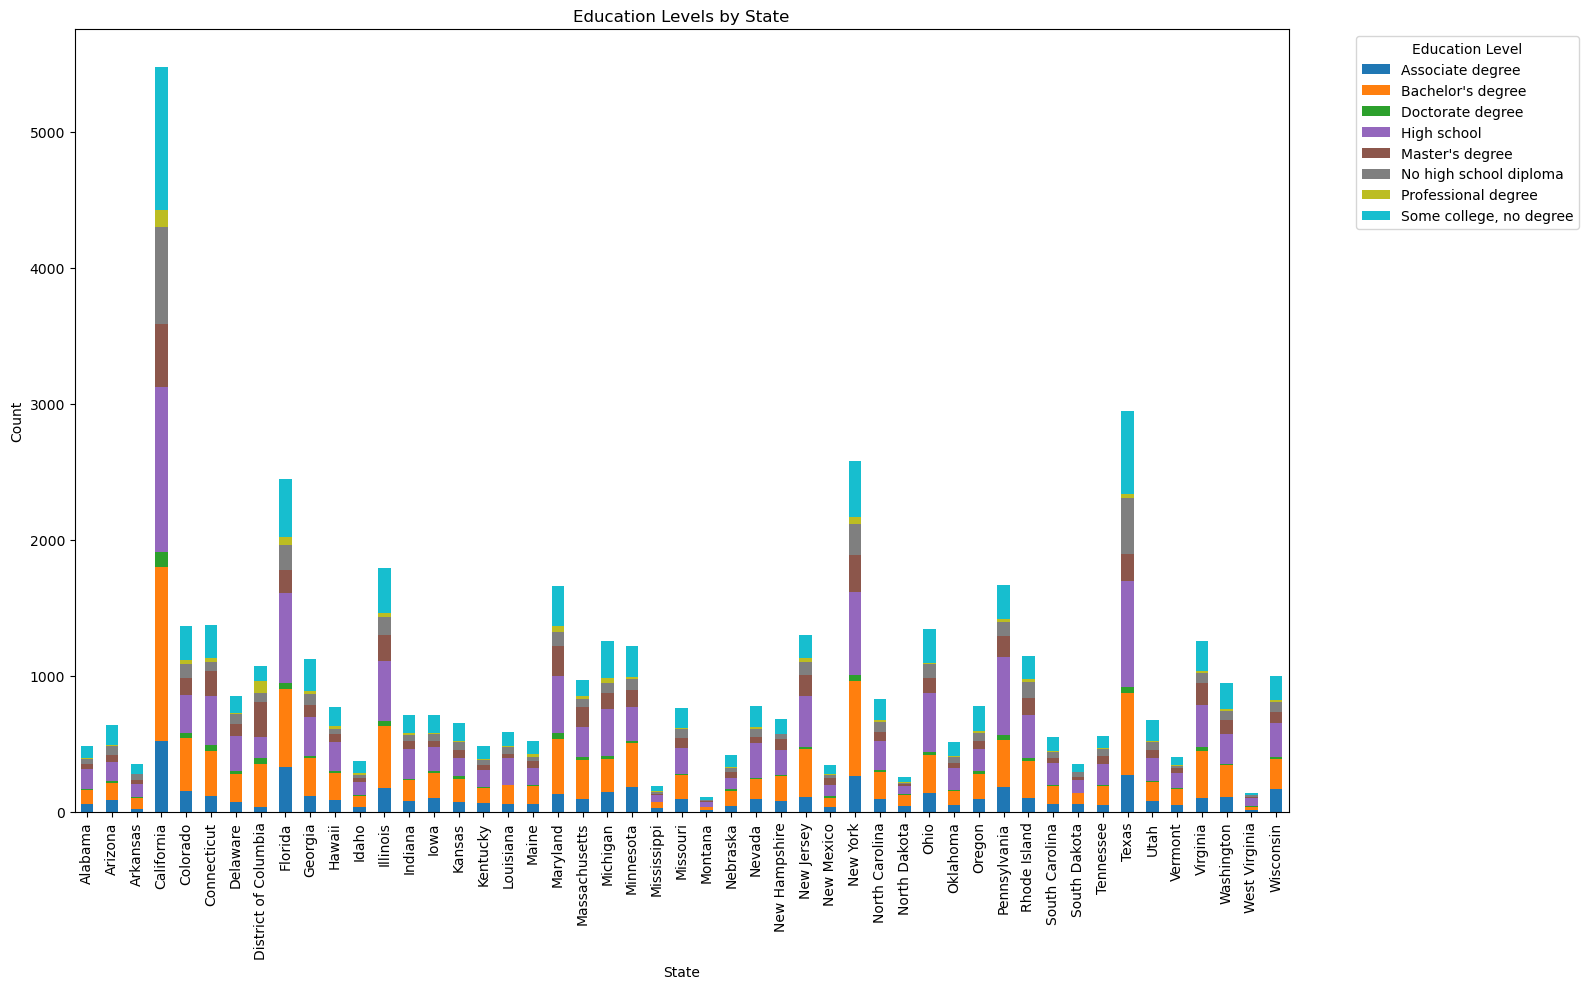

In [26]:
# Plot the stacked bar chart
education_state_data.plot(
    kind='bar',
    stacked=True,
    figsize=(16, 10),
    colormap='tab10'
)
plt.title("Education Levels by State")
plt.xlabel("State")
plt.ylabel("Count")
plt.legend(title="Education Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

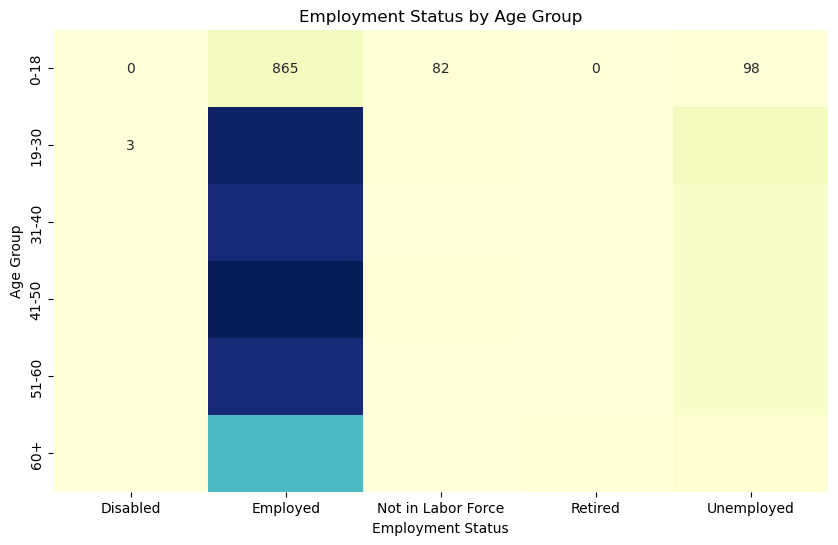

In [34]:
### Heatmap: Employment Status vs Age Groups
# Create age groups
age_bins = [0, 18, 30, 40, 50, 60, 100]
age_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '60+']
cleaned_data.loc[:, 'AgeGroup'] = pd.cut(cleaned_data['Age'], bins=age_bins, labels=age_labels)

# Count the occurrences of Employment Status across age groups
employment_age_group = pd.crosstab(cleaned_data['AgeGroup'], cleaned_data['EmploymentStatus'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(employment_age_group, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title('Employment Status by Age Group')
plt.xlabel('Employment Status')
plt.ylabel('Age Group')
plt.show()


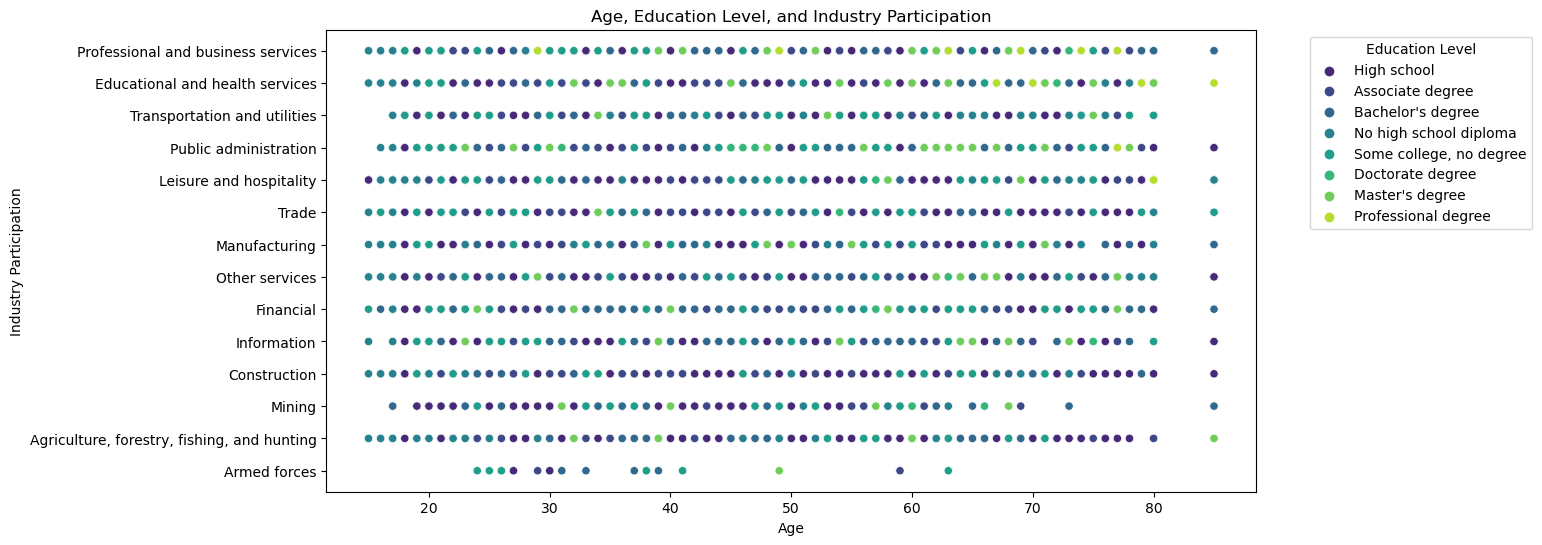

In [36]:
# Scatter plot: Age and Education Level vs Industry Participation
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cleaned_data, x='Age', y='Industry', hue='Education', palette='viridis', marker='o')
plt.title("Age, Education Level, and Industry Participation")
plt.xlabel("Age")
plt.ylabel("Industry Participation")
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [44]:
# Pie Chart: Sex Distribution of Those Not in the Labor Force
sex_counts_nlf = not_in_labor_force['Sex'].value_counts()

# Define a color palette (one color per slice)
colors = plt.cm.Paired(range(len(sex_counts_nlf)))

# Calculate total population
total_population_nlf = sex_counts_nlf.sum()

# Function to display percentages and absolute numbers
def autopct_format(pct, all_vals):
    absolute = int(round(pct / 100. * sum(all_vals)))
    return f"{pct:.1f}%\n({absolute})"

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sex_counts_nlf,
    labels=sex_counts_nlf.index,
    autopct=lambda pct: autopct_format(pct, sex_counts_nlf),
    startangle=140,
    colors=colors  # Use the defined color palette
)
plt.title("Sex Distribution of Those Not in the Labor Force")  # Ensure string is properly closed
plt.text(
    0, -1.2,  # Position of the subtitle
    f"Total Population: {total_population_nlf}",  # Subtitle text
    ha='center',  # Horizontal alignment
    va='center',  # Vertical alignment
    fontsize=12
)
plt.show()


NameError: name 'not_in_labor_force' is not defined